## AUCdt is the Area Under the Distance Threshold Curve, which is similar as a ROC to assess the performance of a multiple-label classification. In our dataset, the classifier has 5 classes and probabilistic predictions. Since true positive rate and false positive rate don't work on the multiple-label classification task. We calculate AUCdt to provide a measurement of the classifier performance.

In [1]:
# =====================================================================
# IMPORT LIBRARIES
# =====================================================================
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline  

In [5]:
def getFile(myFile):
    # Read files
    myData = pd.read_csv(projectPath + myFile)
    return myData

In [7]:
# =====================================================================
# SET PROCESSING VARIABLES - map a network path X:/ to your main folder 
# =====================================================================
global projectPath

# File Paths
projectPath = "C:/Users/William/Downloads/"

In [111]:
# =====================================================================
# GET DATA SETS
# label prefixes - c: rater counts; p: probabilistic; pw: probabilistic weighted
# =====================================================================
# Data Set A for Base Model
fDatasetCols = 'actual_value.csv'
actual = getFile(fDatasetCols)
fDatasetCols = 'predicted_value.csv'
predicted = getFile(fDatasetCols)

In [112]:
actual=actual.drop(['Unnamed: 0'],axis=1)
predicted=predicted.drop(['Unnamed: 0'],axis=1)

## To understand the AUCdt, I use the first observation to make an example. 

In [90]:

value_actual=np.array(actual)[0]

value_predicted=np.array(predicted)[0]

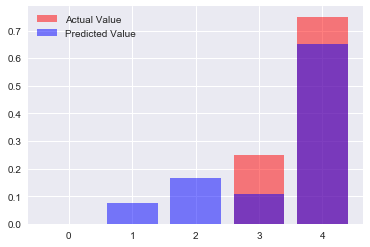

In [103]:
X=range(5)
actual=plt.bar(X,value_actual,align='center',color='red',alpha=0.5)
predict=plt.bar(X,value_predicted,align='center',color='blue',alpha=0.5)
plt.legend((actual[0],predict[0]),('Actual Value','Predicted Value'))
plt.show()

## In the plot we could see the red bar plot is actual value, and the blue bar plot is predicted value. We need to qualify the differences between these two distributions. The ways to qualify the differences are the City Block, Jeffrey Divergence, and Earth Mover's Distance.

## 1. We perform the Jeffrey Divergence distance metrics for each class, and sum the distance of each class to get only one value for each sample.

In [114]:
actual=np.array(actual)
actual

array([[0.        , 0.        , 0.        , 0.25      , 0.75      ],
       [0.        , 0.        , 0.        , 0.5       , 0.5       ],
       [0.        , 0.        , 0.25      , 0.25      , 0.5       ],
       ...,
       [0.        , 0.66666667, 0.33333333, 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.25      , 0.25      , 0.        , 0.5       ]])

In [115]:
predicted=np.array(predicted)
predicted

array([[0.        , 0.075     , 0.16666667, 0.10833333, 0.65      ],
       [0.03333333, 0.45      , 0.41666667, 0.05      , 0.05      ],
       [0.03333333, 0.10833333, 0.23333333, 0.23333333, 0.39166667],
       ...,
       [0.1       , 0.56666667, 0.3       , 0.03333333, 0.        ],
       [0.05      , 0.1       , 0.575     , 0.175     , 0.1       ],
       [0.05      , 0.40833333, 0.28333333, 0.175     , 0.08333333]])

In [121]:
#number of samples
m=actual.shape[0]
#number of labels
p=actual.shape[1]
dist=np.zeros(m)
#compute the Jeffrey Divergence Distance
for i in range(m):
    d=0
    for j in range(p):
        #(A+B)/2
        q=(actual[i,j]+predicted[i,j])/2
        #calculate label's distance between actual value and predicted value
        if actual[i,j]==0 and predicted[i,j]==0:
            d=d+0
        elif actual[i,j]==0 and predicted[i,j]!=0:
            d=d+0+predicted[i,j]*math.log(predicted[i,j]/q)
        elif actual[i,j]!=0 and predicted[i,j]==0:
            d=d+actual[i,j]*math.log(actual[i,j]/q)+0
        else:
            d=d+actual[i,j]*math.log(actual[i,j]/q)+predicted[i,j]*math.log(predicted[i,j]/q)
    dist[i]=d

In [124]:
#dist is the array of distance.
print(dist)
print(dist.shape)

[0.19986826 1.05119465 0.10536796 ... 0.09735573 1.05119465 0.34132982]
(2588,)


## 2. compute the distance-threshold

## After we create all distance, we need to vary distance values for threshold values of 0 to 1 with 0.05 increments, and report the frequency of samples for each threshold value.

In [128]:
DTh=[]
threshold=np.arange(0.0, 1.0, 0.05)
for x in threshold:
    dt=0
    for i in range(dist.shape[0]):
        if dist[i] <= x: #compared the distance with threshold 
            dt=dt+1
        else:
            dt=dt
    DTh = np.append(DTh,dt/dist.shape[0]) # add threshold to threshold list

In [131]:
#the array of distance-threshold
print(DTh)
print(DTh.shape)

[0.         0.02279753 0.07573416 0.14992272 0.22063369 0.2824575
 0.36939722 0.44474498 0.51816074 0.58771252 0.66035549 0.72720247
 0.77163833 0.82457496 0.85973725 0.88987635 0.91035549 0.9374034
 0.95324575 0.9675425 ]
(20,)


C:\Users\William\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


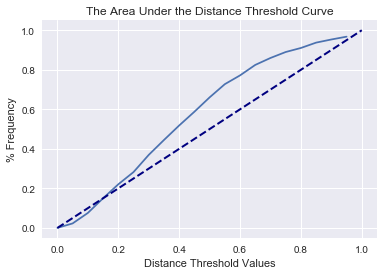

In [136]:
threshold=np.arange(0.0, 1.0, 0.05)
plt.figure()
lw=2
plt.plot(threshold, DTh)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('Distance Threshold Values')
plt.ylabel('% Frequency')
plt.title('The Area Under the Distance Threshold Curve')
plt.legend(loc="lower right")
plt.show()

## 3. We generate the curve. The area under the distance threshold curve could be used for comparison.

In [137]:
area=np.trapz(DTh,threshold)

In [141]:
print('The area under the distance threshold curve is %0.2f'%area)

The area under the distance threshold curve is 0.53
